In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data-analysis/top_directors.csv
/kaggle/input/netflix-data-analysis/growth_by_year.csv
/kaggle/input/netflix-data-analysis/avg_release_year_by_genre.csv
/kaggle/input/netflix-data-analysis/ratings_breakdown.csv
/kaggle/input/netflix-data-analysis/top_genres.csv
/kaggle/input/netflix-data-analysis/movies_vs_tv.csv
/kaggle/input/netflix-data-analysis/top_countries.csv


# Netflix Data Analysis using Google BigQuery & Python

## 📌 Introduction
This project explores the **Netflix Movies & TV Shows dataset (8,800+ titles)**.  
The dataset was analyzed using **SQL in Google BigQuery** and visualized with **Python (Pandas, Matplotlib, Seaborn)**.  

### Objectives
- Understand distribution of Movies vs TV Shows  
- Identify top countries producing Netflix content  
- Explore content growth over time  
- Analyze audience ratings  
- Discover most common genres  
- Study release year patterns by genre  

### Tools Used
- **Google BigQuery**: For SQL queries and data extraction  
- **Python**: For visualization and analysis  
- **Kaggle Notebook**: For integration, documentation, and publishing  


## 1.Import Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load files

In [3]:
movies_vs_tv = pd.read_csv('/kaggle/input/netflix-data-analysis/movies_vs_tv.csv')
top_countries = pd.read_csv('/kaggle/input/netflix-data-analysis/top_countries.csv')
growth_by_year = pd.read_csv('/kaggle/input/netflix-data-analysis/growth_by_year.csv')
ratings_breakdown = pd.read_csv('/kaggle/input/netflix-data-analysis/ratings_breakdown.csv')
top_genres = pd.read_csv('/kaggle/input/netflix-data-analysis/top_genres.csv')
avg_release_year = pd.read_csv('/kaggle/input/netflix-data-analysis/avg_release_year_by_genre.csv')
top_directors = pd.read_csv('/kaggle/input/netflix-data-analysis/top_directors.csv')

5.1 Movies vs TV Shows

## 🎬 Movies vs TV Shows
**SQL Query:**
```sql
SELECT type, COUNT(*) AS total_count
FROM `PROJECT_ID.netflix.titles_clean`
GROUP BY type;




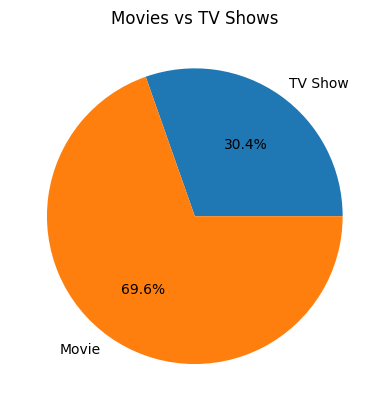

In [4]:
# Pie chart
movies_vs_tv.set_index('type').plot.pie(y='Total_count', autopct='%1.1f%%', legend=False, title='Movies vs TV Shows')
plt.ylabel('')
plt.show()


 **Netflix has ~70% Movies and ~30% TV Shows**


## 🌍 Top 10 Countries by Number of Titles
**SQL Query:**
```sql
SELECT country, COUNT(*) AS total_titles
FROM `PROJECT_ID.netflix.titles_clean`
WHERE country IS NOT NULL
GROUP BY country
ORDER BY total_titles DESC
LIMIT 10;


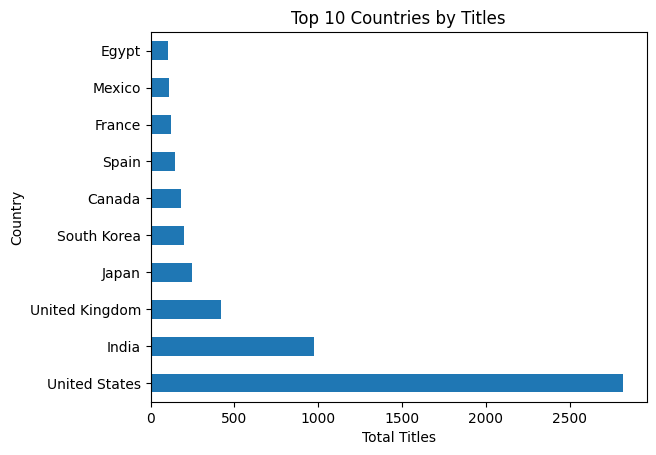

In [5]:
top_countries.plot(kind='barh', x='country', y='total_titles', legend=False, title='Top 10 Countries by Titles')
plt.xlabel('Total Titles')
plt.ylabel('Country')
plt.show()


**The United States and India dominate Netflix content production, followed by the UK, Japan, and South Korea.**


## 📈 Content Growth Over Time
**SQL Query:**
```sql
SELECT EXTRACT(YEAR FROM date_added) AS year_added,
       COUNT(*) AS titles_added
FROM `PROJECT_ID.netflix.titles_clean`
WHERE date_added IS NOT NULL
GROUP BY year_added
ORDER BY year_added;


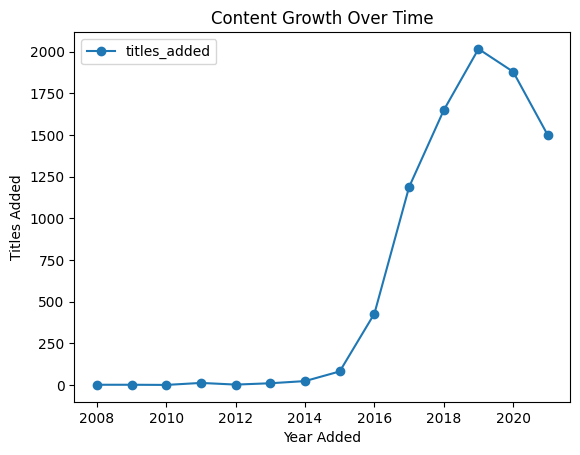

In [6]:
growth_by_year.plot(kind='line', x='year_added', y='titles_added', marker='o', title='Content Growth Over Time')
plt.xlabel('Year Added')
plt.ylabel('Titles Added')
plt.show()


**Content additions accelerated after 2015, peaked around 2019, and slightly slowed after 2020.**


## 🔖 Ratings Breakdown
**SQL Query:**
```sql
SELECT rating, COUNT(*) AS total
FROM `PROJECT_ID.netflix.titles_clean`
WHERE rating IS NOT NULL
GROUP BY rating
ORDER BY total DESC;


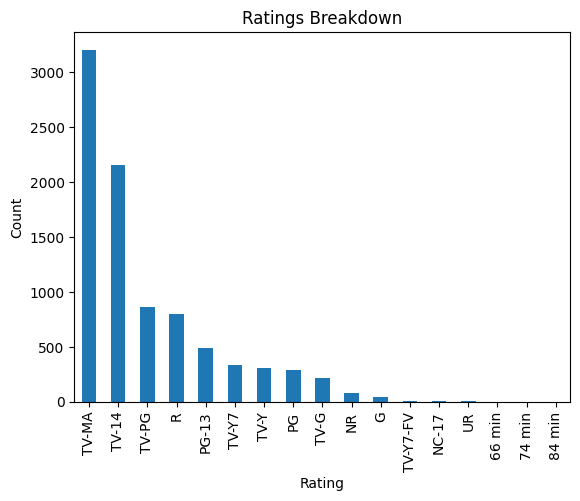

In [7]:
ratings_breakdown.plot(kind='bar', x='rating', y='total', legend=False, title='Ratings Breakdown')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


**The most common ratings are TV-MA (mature audiences) and TV-14, showing a focus on teen and adult content.**


## 🎭 Top 15 Genres
**SQL Query:**
```sql
WITH exploded AS (
  SELECT TRIM(genre) AS genre
  FROM `PROJECT_ID.netflix.titles_clean`,
  UNNEST(SPLIT(listed_in, ',')) AS genre
)
SELECT genre, COUNT(*) AS total
FROM exploded
GROUP BY genre
ORDER BY total DESC
LIMIT 15;


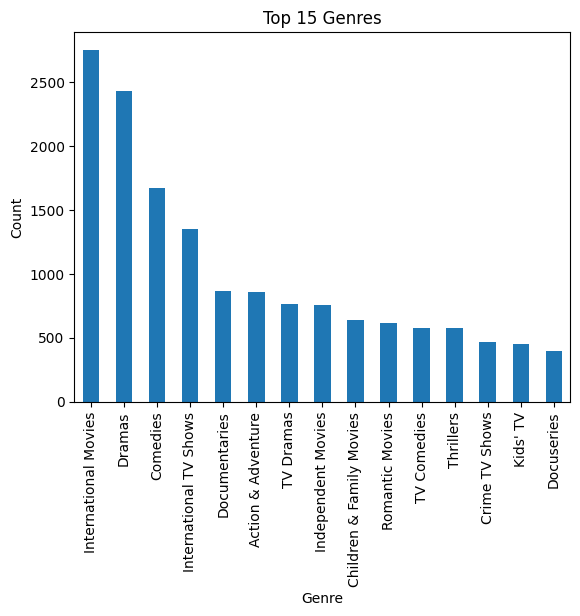

In [8]:
top_genres.plot(kind='bar', x='genre', y='total', legend=False, title='Top 15 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


**Drama and Comedy are the most common genres, reflecting broad audience appeal.**



## ✅ Conclusion
Key takeaways from this analysis:  
- Netflix has more **Movies (~70%)** than TV Shows.  
- **US and India** are top contributors to Netflix’s catalog.  
- Content additions peaked around **2019**.  
- **TV-MA and TV-14** are the most common ratings.  
- **Drama and Comedy** dominate genres across the platform.  

This project strengthened skills in:  
- **SQL in BigQuery** (data cleaning, aggregation, UNNEST)  
- **Python visualization** (Pandas, Matplotlib, Seaborn)  
- **Data storytelling** through clear insights and charts.  


## 📚 References
- Dataset: [Netflix Movies & TV Shows on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)  
- Google BigQuery Documentation: [BigQuery SQL Functions](https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-and-operators)  
- Python Libraries: Pandas, Matplotlib, Seaborn  
